# Intial Overview of the Data

The data was obtained from Kaggle https://www.kaggle.com/harlfoxem/housesalesprediction

## 1. Looking at the Numbers

In [315]:
import pandas as pd
import numpy as np

houseData = pd.read_csv("kc_house_data.csv")
houseData.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5991,9523103000,20141020T000000,780000.0,3,1.75,2430,4524,1.5,0,0,...,7,1830,600,1924,0,98103,47.6740,-122.350,1610,4100
17052,203900380,20140821T000000,326188.0,3,1.00,1300,8800,1.0,0,0,...,7,1300,0,1977,0,98053,47.6400,-121.966,1600,12210
15250,2207200635,20140602T000000,439800.0,3,1.50,1120,6900,1.0,0,0,...,7,1120,0,1956,0,98007,47.6023,-122.132,1300,7000
21419,2254501095,20141113T000000,729999.0,2,2.25,1630,1686,2.0,0,0,...,10,1330,300,2014,0,98122,47.6113,-122.314,1570,2580
6347,5608000840,20140724T000000,905000.0,4,2.50,3520,12193,2.0,0,0,...,10,3520,0,1993,0,98027,47.5535,-122.095,3470,11318


In [316]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


There are no empty values in this dataset, which is pretty good since we don't have to fill in the NA values. <br>
However, this is a lot of features, and a lot of features can lead to lower accuracy since we don't have that many data. <br>
So, we will have to delete some of the features.


## 1.1 Finding Paraameters to remove

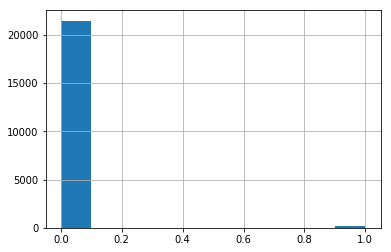

In [317]:
houseData["waterfront"].hist()

Since many houses don't have waterfront. I think it is safe to delete it.

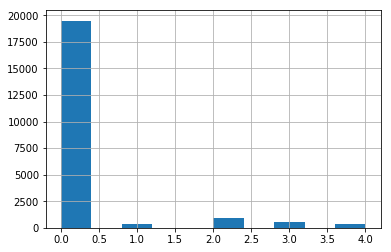

In [318]:
houseData["view"].hist()

Since the majority of the houses' view is zero. I think view should be deleted as well

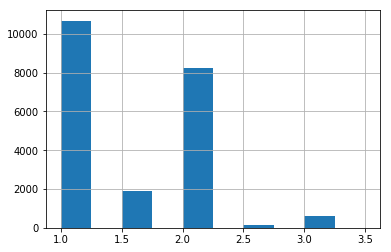

In [319]:
houseData["floors"].hist()

There're houses who has 2.5 floors? Let's see it in more detail.

In [320]:
houseData[["price", "floors"]][houseData.floors == 2.5].head()

,price,floors
484,1385000.0,2.5
518,2250000.0,2.5
577,930000.0,2.5
759,405600.0,2.5
815,379000.0,2.5


In [321]:
houseData["price"][houseData.floors == 2.5].count()

161

Interesting. So I guess that there are 161 houses with 2.5 floors. <br>
I think that number of floors is useful, so we will keep it.

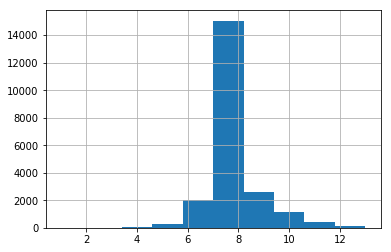

In [322]:
houseData["grade"].hist()

So, I'm guessing that the grade is useful since there are actually numbers associated with the listings. We will keep it

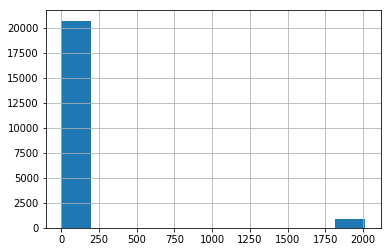

In [323]:
houseData["yr_renovated"].hist()

I'm definitely going to throw year renovated away.

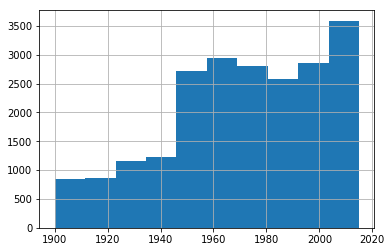

In [324]:
houseData["yr_built"].hist()

This looks pretty good!

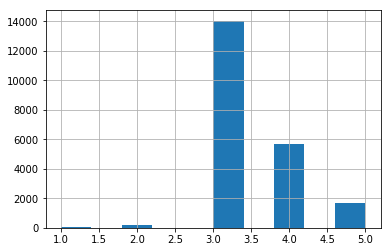

In [325]:
houseData["condition"].hist()

I'm going to keep this one since it is not too skewed.

So, features that I'm going to throw away is:
1. id
2. date
3. view
4. waterfront
5. year renovated
6. zipcode

## 2. Visualizing Data

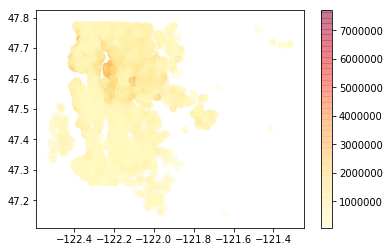

In [326]:
import matplotlib.pyplot as plt
prices = houseData["price"]
longitude = houseData["long"]
latitude = houseData["lat"]

plt.scatter(longitude, latitude, c=prices, cmap = "YlOrRd", alpha = 0.3)
plt.colorbar()
plt.show()

It looks like that there are a large number of houses whose prices are beloiw 1,000,000 dollars,  which makes sense. <br>
Not many houses are above 1,000,000 dollars. <br>
However, we can see that there are quite a few houses at the center whose prices are above 1,000,000 dollars.

### 2.1 Breaking the Price Range To get Clearer Picture

To see the clearer picture of the higher-end houses, we will be splitting the data set to visualize the data set better <br>
We will be splitting the price ranges from 0 - 1,000,000 and 1,000,000 to max.<br>
This way, we can see the data more clearly for both dataset. <br>

#### Part 1. Housing Price Visualation for Houses Whose Price is Less than 1,000,000

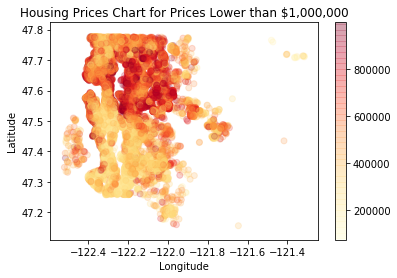

In [327]:
housesLower = houseData.loc[houseData["price"] < 1000000]
housesHigher = houseData.loc[houseData["price"] >= 1000000]

plt.scatter(housesLower["long"], housesLower["lat"], c= housesLower["price"], cmap="YlOrRd", alpha = 0.2)
plt.colorbar()
plt.title("Housing Prices Chart for Prices Lower than $1,000,000")
plt.ylabel ("Latitude")
plt.xlabel ("Longitude")
plt.show()

This is the visualization of the housing that are below 1,000,000 dollars <br>
As you can see, the lower end houses are below 47.5 latitude <br>
And the prices goes up and the higher end houses forms a circle.<br>
From this, it looks like that the housing prices tend to goes up higher as we move closer to that center <br>

Part 2. Housing Price Visualation for Pricing that is Higher than 1,000,000 dollars.

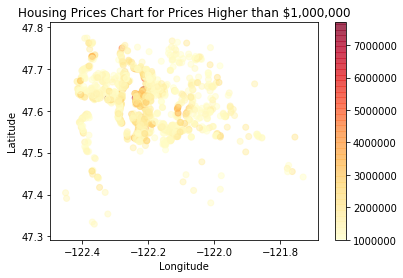

In [328]:
plt.scatter(housesHigher["long"], housesHigher["lat"], c= housesHigher["price"], cmap="YlOrRd", alpha = 0.5)
plt.colorbar()
plt.title("Housing Prices Chart for Prices Higher than $1,000,000")
plt.ylabel ("Latitude")
plt.xlabel ("Longitude")
plt.show()

By looking at these two graphs, we can see that the higher priced houses are centralized in one area. <br>
So, longitude and latitude matter!<br>
Also, we see that the relationship between longitude/latitude and price is a non-linear relationship <br>
The reason is that the price doesn't linearly affected as longitude and latitude increases. <br>
So, I don't think that the linear regression is going to be very effective... <br>
The prices of a house really depends on the longitude and latitude in this dataset <br>

### 2.2 Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D23820D68>]],
      dtype=object)

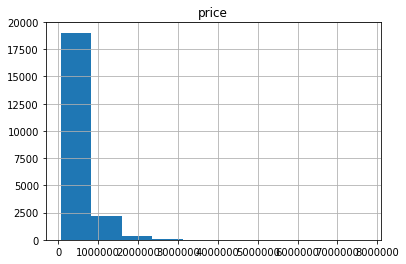

In [329]:
houseData[["price"]].hist()

Here we can see that the prices are very heavy on the one side.

### Takeaway from Visualization
1. We can see that many of the houses are below 1,500,000 dollars.
2. We also can see that longitude/latitude has an nonlinear relationship with the house prices. This means that linear regression is probably not a good option, but we can always try it:)
3. House prices get really high at one location. 

# 3. Splitting Training Set and Test Set
We need to split off the training set and the test set. <br>
Since the house prices are lop-sided and we don't have much entry, we should use stratified splitting.

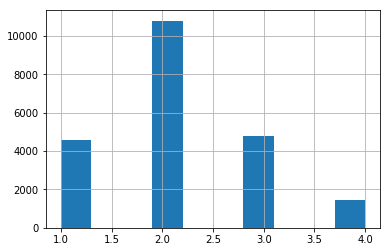

In [330]:
houseData["housePriceCategory"] = pd.cut(houseData["price"], bins = [0, 300000, 600000, 1000000, np.inf], labels = [1, 2, 3, 4])
houseData["housePriceCategory"].hist()

I've split the houses according to price, and this looks pretty good. Now, I'll split it according to these prices.

In [331]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffleSplit = StratifiedShuffleSplit(test_size = 0.3, random_state = 42)
for trainIndex, testIndex in shuffleSplit.split(houseData, houseData["housePriceCategory"]):
    trainSet = houseData.iloc[trainIndex]
    testSet = houseData.iloc[testIndex]
trainSet.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,housePriceCategory
9059,8731900790,20140626T000000,354950.0,4,2.75,2530,7350,1.0,0,0,...,1280,1250,1977,0,98023,47.3130,-122.374,2280,7350,2
13879,9238450330,20141110T000000,330000.0,3,1.00,1070,10563,1.0,0,0,...,1070,0,1969,0,98072,47.7687,-122.166,1840,9638,2
12286,727500030,20140715T000000,815000.0,3,1.50,1370,8671,1.0,0,0,...,1370,0,1955,0,98004,47.6217,-122.198,1580,8671,3
3218,3574801110,20141125T000000,405000.0,4,2.75,2360,7716,1.0,0,0,...,1390,970,1978,0,98034,47.7301,-122.223,2160,8794,2
5287,7754900280,20140623T000000,322200.0,4,2.25,2010,19000,2.0,0,0,...,2010,0,1975,0,98042,47.3734,-122.119,1950,19626,2


# 4. Data Cleaning
Now, we need to do some cleaning with the data. We will use both built-in transformers and custom transformers to automate the process of cleaning the data.


## 4.1 Separating X values and y values

In [332]:
trainSetCopy = trainSet.copy()
trainPrices = trainSetCopy["price"]
trainFeatures = trainSetCopy.drop(columns = "price")

## 4.2 Custom Transformer (Deleting the "bad" Features)
We will be deleting these features:
1. id
2. date
3. view
4. waterfront
5. year renovated
6. zipcode
7. housePriceCategory

In [333]:
from sklearn.base import BaseEstimator, TransformerMixin

class deleteAttributes (BaseEstimator, TransformerMixin):
    def fit (self, X, y=None):
        return self
    def transform (self, X, y=None):
        X = X.drop(["id", "date", "view", "waterfront", "yr_renovated", "zipcode", "housePriceCategory"], axis=1)
        return X
        
test = deleteAttributes()
X = test.transform(trainFeatures)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
9059,4,2.75,2530,7350,1.0,5,8,1280,1250,1977,47.3130,-122.374,2280,7350
13879,3,1.00,1070,10563,1.0,3,7,1070,0,1969,47.7687,-122.166,1840,9638
12286,3,1.50,1370,8671,1.0,3,7,1370,0,1955,47.6217,-122.198,1580,8671
3218,4,2.75,2360,7716,1.0,3,7,1390,970,1978,47.7301,-122.223,2160,8794
5287,4,2.25,2010,19000,2.0,4,8,2010,0,1975,47.3734,-122.119,1950,19626


## 4.3 Feature Scaling and Data Pipeline
We've made a pipeline that deletes the "bad features" and also scales the features.

In [334]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline ([
    ("delete", deleteAttributes()),
    ("standard", StandardScaler()),
])

cleanedTrainSet = pipeline.fit_transform(trainFeatures)

# 5. Training the Linear Model

In [335]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_regression = LinearRegression()
lin_regression.fit(cleanedTrainSet, trainPrices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 5. Making Predictions on the Test Set

## 5.2 Prediction without a Function


In [336]:
testY = testSet.copy()["price"]
testX = testSet.copy().drop(columns = "price")
cleanedTestSet = pipeline.fit_transform(testX)

housing_predictions = lin_regression.predict(cleanedTestSet)
squaredError = mean_squared_error(testY, housing_predictions)
error = np.sqrt(squaredError)
print("The total error is $", error)

The total error is $ 215488.6144657396


## 5.2 Making a function so that prediction makes it easier


In [337]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

def splitting(dataFrame):
    y = dataFrame.copy()["price"]
    features = dataFrame.copy().drop(columns = "price")
    return (features, y)

def cleanData(features):
    X = pipeline.fit_transform(features)
    return X

def trainRegressor (features, y):
    lin_regression = LinearRegression()
    lin_regression.fit(features, y)
    return lin_regression


def predictionErrors(linearRegressor, features, y):
    prediction = linearRegressor.predict(features)
    mse = mean_squared_error(prediction, y)
    error = np.sqrt(mse)
    return error

def rawData_to_prediction (trainSet, testSet):
    trainX, trainY = splitting(trainSet)
    testX, testY = splitting(testSet)
    trainCleaned, testCleaned = cleanData(trainX), cleanData(testX)
    regressor = trainRegressor (trainCleaned, trainY)
    testSetError = predictionErrors(regressor, testCleaned, testY)
    return testSetError

error = rawData_to_prediction (trainSet, testSet)
print("The total error is $", error)


The total error is $ 215488.6144657396


The error of 215,488 dollars is pretty bad but considering that the highest house price was somewhere around 7,500,000 dollars need to be considered. <br>
Also, I think that just a simple linear regression did a pretty good job with the error of around 200,000. dollars <br>
I could add more features such later on such as playing with the parameters and using more complicated models.